In [265]:
import pandas as pd
import numpy as np

In [266]:

data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i[1].csv')

In [267]:
data = data.drop('Loan_ID', axis=1)


In [268]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
526,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
94,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
362,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,Y
420,Male,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [270]:
data.shape

(614, 12)

In [271]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [272]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='count', ylabel='Gender'>

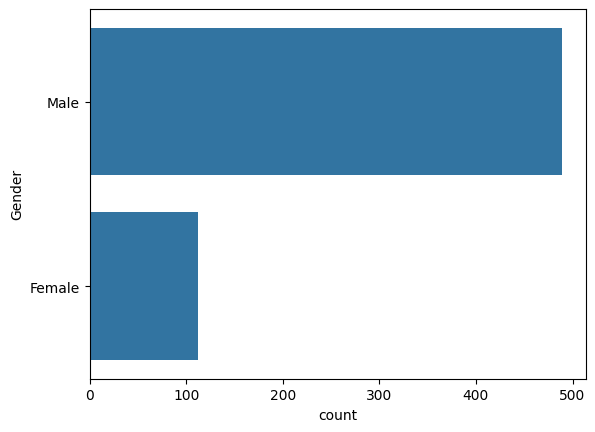

In [273]:
import seaborn as sns
sns.countplot(data['Gender'])

<Axes: xlabel='Married', ylabel='count'>

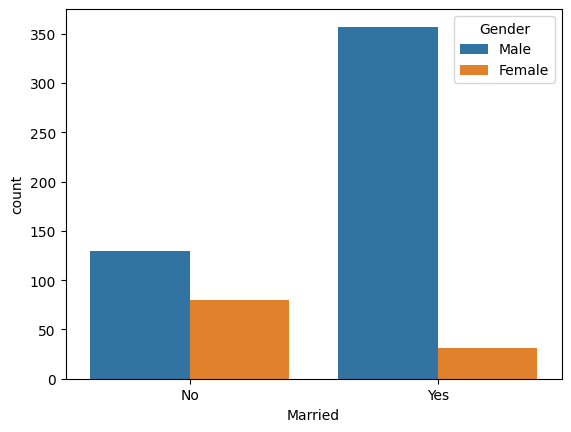

In [274]:
sns.countplot(x='Married', hue='Gender', data=data)

<Axes: xlabel='Education', ylabel='count'>

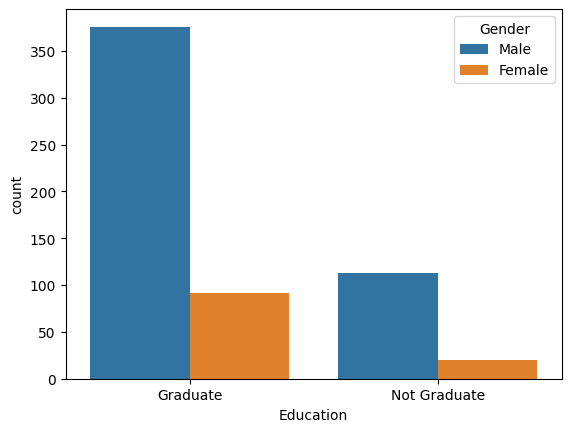

In [275]:
sns.countplot(x='Education', hue='Gender', data=data)

<Axes: xlabel='Dependents', ylabel='count'>

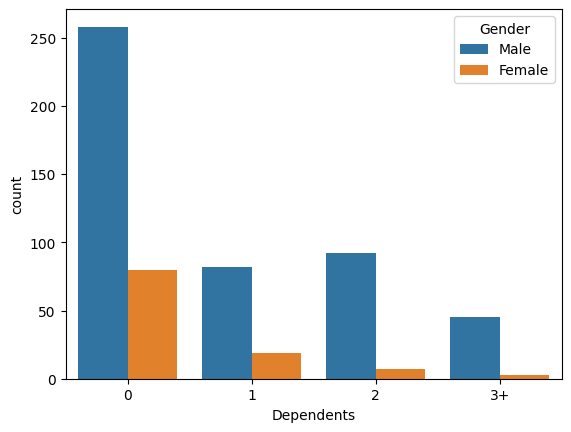

In [276]:
sns.countplot(x='Dependents', hue='Gender', data=data)

In [277]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

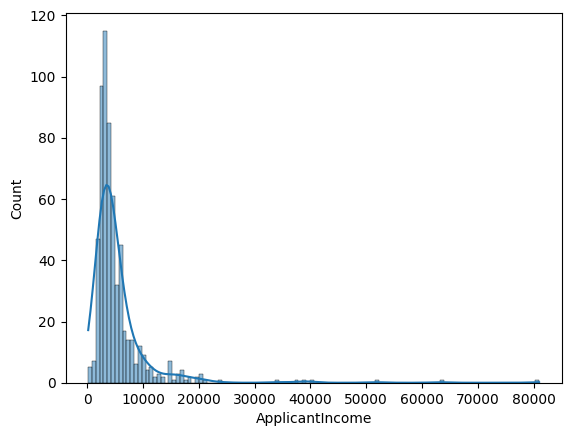

In [278]:
sns.histplot(data['ApplicantIncome'], kde=True) # Right skewed

<Axes: ylabel='ApplicantIncome'>

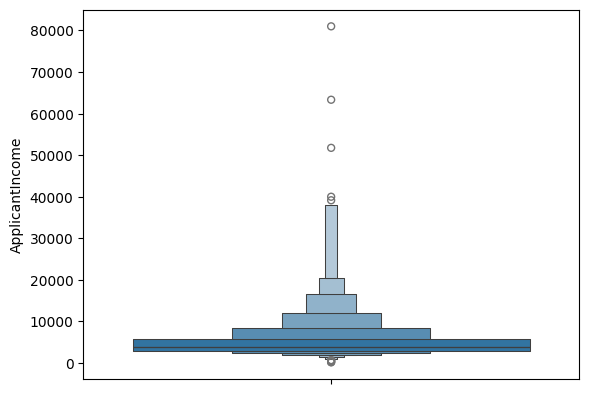

In [279]:
sns.boxenplot(data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

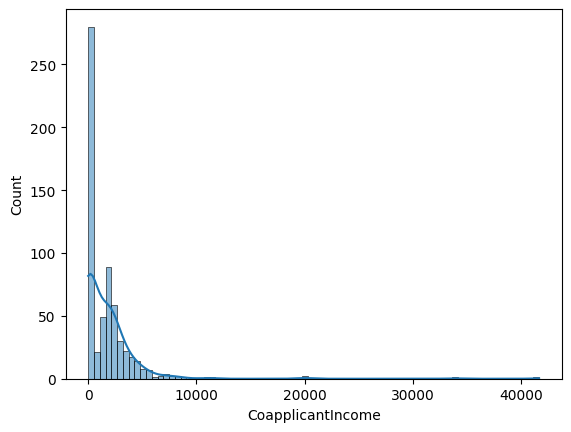

In [280]:
sns.histplot(data['CoapplicantIncome'], kde=True)

<Axes: ylabel='CoapplicantIncome'>

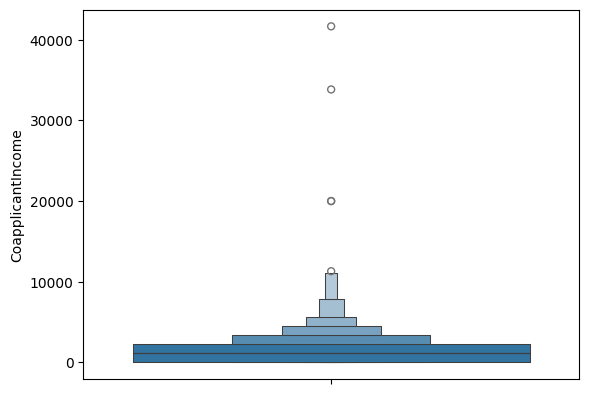

In [281]:
sns.boxenplot(data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

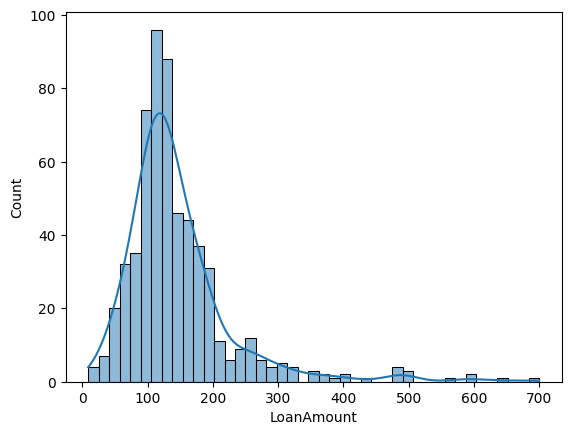

In [282]:
sns.histplot(data['LoanAmount'], kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

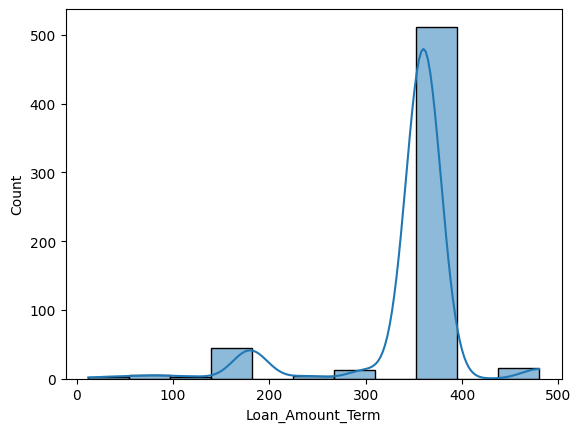

In [283]:
sns.histplot(data['Loan_Amount_Term'], kde=True)

In [284]:
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [285]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)


In [286]:
data['Gender'].fillna('Missing',inplace=True)

In [287]:
data['Dependents'].fillna('Missing',inplace=True)

In [288]:
data['Self_Employed'].fillna('Missing',inplace=True)

In [289]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [290]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [291]:
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [296]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [297]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer(transformers=[
    ('trf1', OneHotEncoder(sparse_output=False, drop='first'), ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])
], remainder='passthrough')

In [298]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [301]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7723577235772358